In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# importing all the required libraries,packages and models.

In [7]:
df = 'sample.csv'
info = pd.read_csv(df)
print(info.head())

#Loading csv file and displaying dataframe using pandas.

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

C:\Pyhton311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6074 - loss: 1.1429 - val_accuracy: 0.7850 - val_loss: 0.6293
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8211 - loss: 0.5228 - val_accuracy: 0.8081 - val_loss: 0.5508
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.4704 - val_accuracy: 0.8194 - val_loss: 0.5129
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.4008 - val_accuracy: 0.8206 - val_loss: 0.5279
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8599 - loss: 0.3940 - val_accuracy: 0.8363 - val_loss: 0.4727
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8777 - loss: 0.3541 - val_accuracy: 0.8300 - val_loss: 0.5037
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8832 - loss: 0.3291 - val_accuracy: 0.8406 - val_loss: 0.4768
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8848 - loss: 0.3205 - val_accuracy: 0.

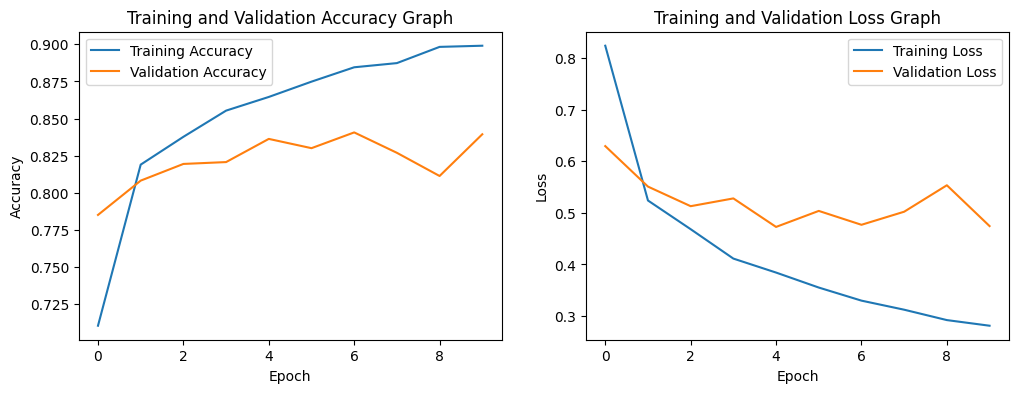

In [11]:
# Selection of row | column position.
label = info.iloc[:, 0].values
images = info.iloc[:, 1:].values

# Reshape and normalizing the images.
images = images.reshape(-1, 28, 28) / 255.0

# Converting integer class label to One-hot encode.
label = to_categorical(label)

# Split the data.(20% for test set and 80% for training)
train_images, test_images, train_label, test_label = train_test_split(images, label, test_size=0.2, random_state=42)

validation_images, train_images, validation_label, train_label = train_test_split(train_images, train_label, test_size=0.8, random_state=42)

# Building the Feed-forward Neural Network.
model = Sequential([Flatten(input_shape=(28, 28)),Dense(128, activation='relu'),Dense(64, activation='relu'),Dense(10, activation='softmax')])
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training Model.
mod_train = model.fit(train_images, train_label, epochs=10, batch_size=32, validation_data=(validation_images, validation_label))

# Evaluating Model.
test_loss, test_accuracy = model.evaluate(test_images, test_label)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

#plotting required graphs 

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mod_train.history['accuracy'], label='Training Accuracy')
plt.plot(mod_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mod_train.history['loss'], label='Training Loss')
plt.plot(mod_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Graph')
plt.legend()
plt.show()



# 1. This code processes the Fashion MNIST dataset.
# 2. Builds and trains a feed-forward neural network model, evaluates its performance on the test set, and generates a classification report. 
# 3. Plotting the training and validation accuracy.



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       192
           1       0.98      0.95      0.97       192
           2       0.75      0.78      0.76       212
           3       0.84      0.93      0.88       205
           4       0.81      0.79      0.80       204
           5       0.96      0.93      0.95       193
           6       0.60      0.65      0.63       200
           7       0.92      0.91      0.91       206
           8       0.94      0.96      0.95       196
           9       0.92      0.94      0.93       200

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



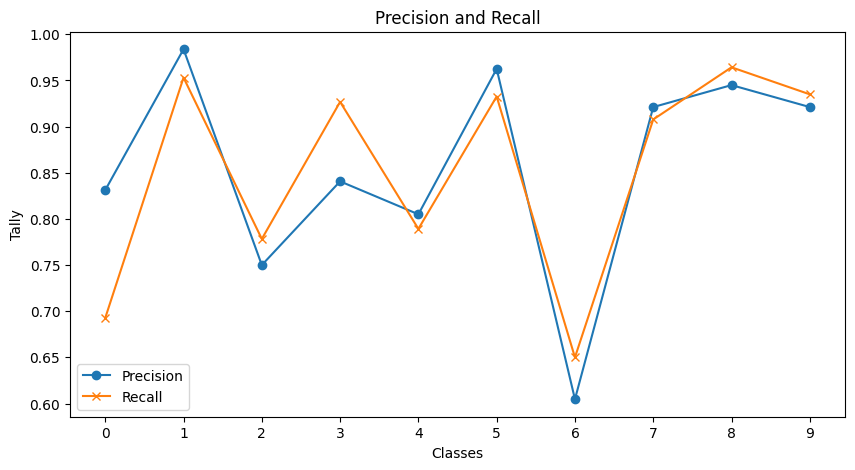

In [12]:


# Predicting and generating classification report.
test_pred = model.predict(test_images)
pred_classes = np.argmax(test_pred, axis=1)
true_classes = np.argmax(test_label, axis=1)
print(classification_report(true_classes, pred_classes))


# Calculating precision, recall.
precision, recall, fscore, _ = precision_recall_fscore_support(true_classes, pred_classes)



# Plotiing Precision and Recall Graphs.
plt.figure(figsize=(10, 5))
plt.plot(range(len(precision)), precision, marker='o', label='Precision')
plt.plot(range(len(recall)), recall, marker='x', label='Recall')
plt.xticks(range(10))
plt.xlabel('Classes')
plt.ylabel('Tally')
plt.title('Precision and Recall')
plt.legend()
plt.show()



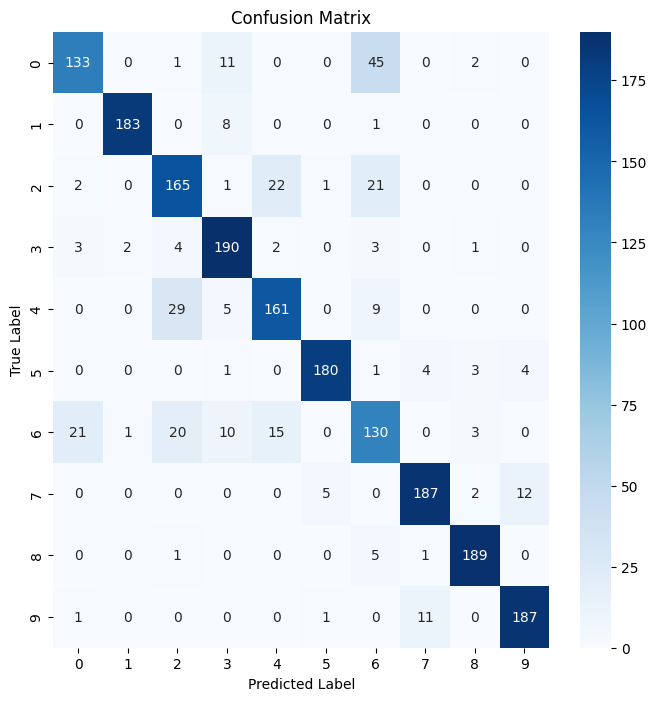

In [13]:
# Confusion Matrix.
confus_matrix = confusion_matrix(true_classes, pred_classes)

#Ploting Confusion Matrix.
plt.figure(figsize=(8, 8))
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()